In [33]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import os
import urllib.request


In [34]:
DRIVER_PATH = 'chromedriver.exe'
driver = webdriver.Chrome(executable_path=DRIVER_PATH)
plant = "potato 'King Edward'"
driver.get('https://www.google.com/search?q=' + plant +'&sxsrf=ALiCzsaji2Ezf_rA_JnE3VktpaOIKntPwQ:1669746319888&source=lnms&tbm=isch&sa=X&ved=2ahUKEwic74vigdT7AhU-BjQIHVMDA_wQ_AUoAXoECAIQAw&biw=458&bih=992&dpr=1.25')

height_before = driver.execute_script("return document.body.scrollHeight")

for i in range(15):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    height_after = driver.execute_script("return document.body.scrollHeight")
    time.sleep(3)
    if (height_after == height_before):
        try:
            element = driver.find_elements(By.CLASS_NAME, "mye4qd")[0].click()
            element[0].click()
        except:
            pass
    
    height_before = height_after
# print(driver.page_source)


soup = BeautifulSoup(driver.page_source)
pictures = soup.find_all("div", {"class": "isv-r PNCib MSM1fd BUooTd"})

driver.close()

C:\Users\abeme\AppData\Local\Temp\ipykernel_27404\2638582643.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=DRIVER_PATH)






















https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUyMScOXK99QJLun2lkxtv2LCj1LYGWbo7-Q&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3tUfnm5WyG7aqoXAvXlCNwVARDxSk46Avpw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZzFy6hIOqNnBTwUq7WtoENxaZG-6rDX30ag&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZjU7pZ7rG333wnt04cwr_SrU5kEK-JJVuhw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRMdgR8Sx57cZaeNIJAZwA3H_SmjOQLkjiBA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3tQPvskNOivCBQM57U0s230ZfZunCdkaPFg&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ395zk0yEf6E0fGQP75ggp7pHboTSXwhA-tQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8ZhoqMWVniQMIMc_8F-khS9tz0JbBAC4B0Q&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNNSSYwkZ_DViJXbN6AGwgCby0zj3UP2B5Fw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjXTjLbLBI1Hpn69M9GLxR0l4b
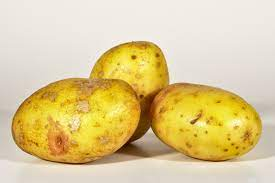
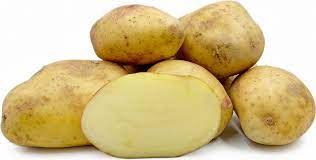
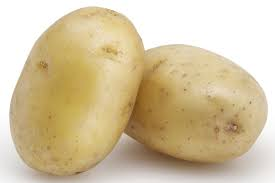
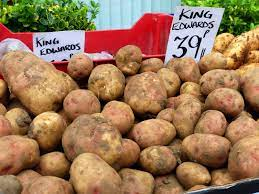
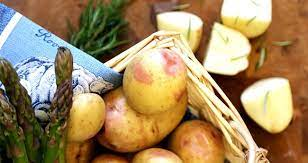
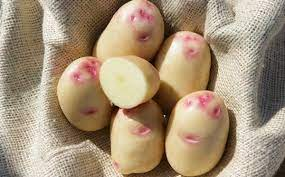
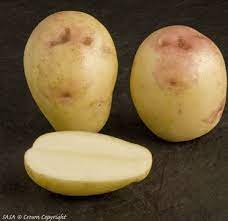
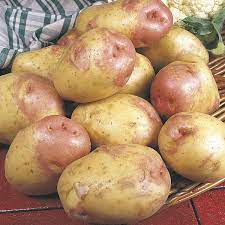
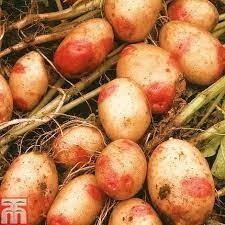
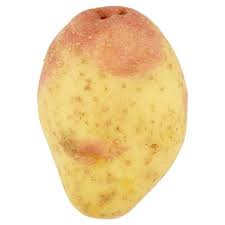
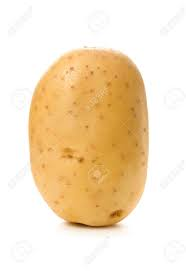
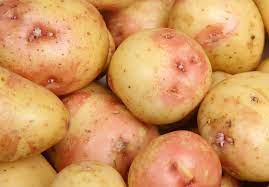
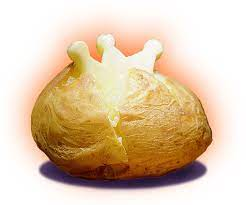
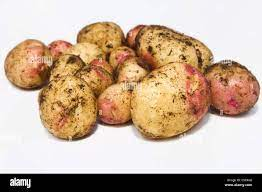
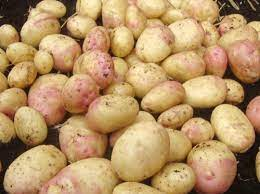
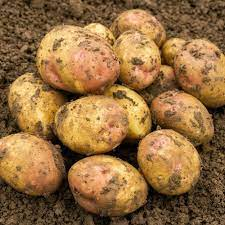
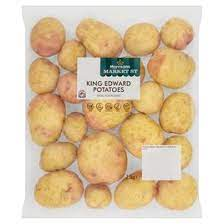
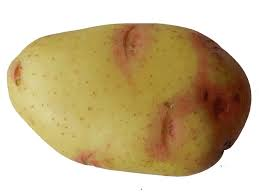
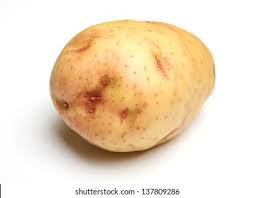
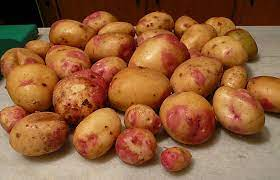

409

In [35]:
urls = []
for each in pictures:
    img = each.find("img")
    if img.has_attr('src'):
        print(img['src'])
        urls.append(img['src'])

len(urls)

In [36]:
import pathlib
import urllib3
from concurrent.futures import ThreadPoolExecutor

try:
    os.makedirs("plant/" + plant)
except FileExistsError:
    pass


def downloader(link, i):
    file_name = "plant/" + plant + "/" + plant + str(i) + ".jpeg"
    urllib.request.urlretrieve(link, file_name)
    # time.sleep(5)

# connection_mgr = urllib3.PoolManager(maxsize=5)
# thread_pool = ThreadPoolExecutor(5)

with ThreadPoolExecutor() as executor:
    i = range(len(urls))
    results = executor.map(downloader, urls, i)


# i = 1
# for link in urls:

#     file_name = plant + str(i) + ".jpeg"
    
#     urllib.request.urlretrieve(link, file_name)
#     time.sleep(5)
#     i += 1